In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
import cv2
from matplotlib.image import imread

In [2]:
from PIL import Image
import numpy as np
import cv2
from PIL import (Image,ImageFont,ImageDraw)   
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
import tensorflow as tf

Visulize Cat Images

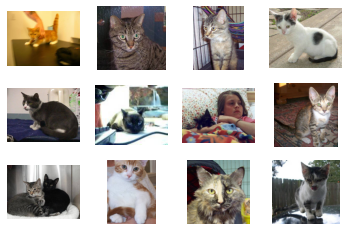

In [3]:
cat_images="../input/dogs-vs-cats/train/train/"


for i in range(12):
    plt.subplot(3,4,i+1)

    file_name=cat_images+"cat."+str(i)+".jpg"
    load_image=imread(file_name)
    plt.imshow(load_image)
    plt.axis("off")

plt.show()

Visulize Dog Images

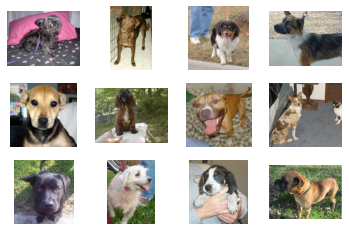

In [4]:
dog_images="../input/dogs-vs-cats/train/train/"


for i in range(12):
    plt.subplot(3,4,i+1)

    file_name=cat_images+"dog."+str(i)+".jpg"
    load_image=imread(file_name)
    plt.imshow(load_image)
    plt.axis("off")

plt.show()

In [5]:
image_path="../input/dogs-vs-cats/train/train/"

In [6]:
Image_Width=227
Image_Height=227
image_size=(Image_Width,Image_Height)
Image_Channels=3

In [7]:
image_data=os.listdir("../input/dogs-vs-cats/train/train/")

In [8]:
label_list=[]
for file_name in image_data:
    label=file_name.split(".")[0]
    if(label=="dog"):
        label_list.append("dog")
    else:
        label_list.append("cat")

final_data=pd.DataFrame({"filename":image_data,"label":label_list})
        
    

In [9]:
final_data

,filename,label
0,cat.12461.jpg,cat
1,dog.3443.jpg,dog
2,dog.7971.jpg,dog
3,dog.10728.jpg,dog
4,dog.1942.jpg,dog
...,...,...
24995,cat.3664.jpg,cat
24996,dog.1783.jpg,dog
24997,dog.9392.jpg,dog
24998,dog.1631.jpg,dog


Splitting training and testing data

In [10]:
X_train, X_test = train_test_split(final_data, test_size=0.20, random_state=42)

X_train= X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)


In [11]:
total_train=X_train.shape[0]
total_test=X_test.shape[0]


In [12]:
total_train=X_train.shape[0]
total_test=X_test.shape[0]
batch_size=10

Generate data for training and validation

In [13]:
train_data_generator= ImageDataGenerator(rotation_range=15,
                                       rescale=1./255,
                                       shear_range=0.1,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       width_shift_range=0.1,
                                       height_shift_range=0.1)



traindata_generator=train_data_generator.flow_from_dataframe(X_train,image_path,x_col="filename",y_col="label",target_size=image_size,
                                                            class_mode="categorical",batch_size=batch_size)




Found 20000 validated image filenames belonging to 2 classes.


In [14]:
valid_data_generator=ImageDataGenerator(rescale=1./255)

validdata_generator=valid_data_generator.flow_from_dataframe(X_test,image_path,x_col="filename",y_col="label",target_size=image_size,
                                                            class_mode="categorical",batch_size=batch_size)

Found 5000 validated image filenames belonging to 2 classes.


In [15]:
test_data_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

testdata_generator = train_data_generator.flow_from_dataframe(X_train,
                                                 image_path,x_col='filename',y_col='label',
                                                 target_size=image_size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.


In [16]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Create  AlexNet Model

In [17]:
model=Sequential()

#1st Conv2D Layer

model.add(Conv2D(96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid",data_format=None))
model.add(Dropout(0.25))

#2nd Conv2D Layer

model.add(Conv2D(256,kernel_size=(5,5),strides=1,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid",data_format=None))
model.add(Dropout(0.25))


#3rd Conv2D Layer

model.add(Conv2D(384,kernel_size=(5,5),strides=1,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#4th Conv2D Layer

model.add(Conv2D(384,kernel_size=(5,5),strides=1,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))


#5th Conv2D Layer

model.add(Conv2D(256,kernel_size=(5,5),strides=1,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid",data_format=None))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(4096,activation="relu"))
model.add(Dense(4096,activation="relu"))
model.add(Dense(1000,activation="relu"))

model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(2,activation="softmax"))

model.compile(loss="categorical_crossentropy" ,optimizer="adam",metrics=["accuracy"])

2022-07-18 15:52:57.146662: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 15:52:57.156843: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 15:52:57.157760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 15:52:57.159661: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
dropout (Dropout)            (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0

In [19]:
history=model.fit(traindata_generator,epochs=30,validation_data=validdata_generator,validation_steps=total_test//batch_size,steps_per_epoch=total_train//batch_size)

2022-07-18 15:52:58.534044: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-07-18 15:53:00.151865: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2000/2000 [==============================] - 328s 163ms/step - loss: 0.7505 - accuracy: 0.5402 - val_loss: 0.7570 - val_accuracy: 0.5968
Epoch 2/30
2000/2000 [==============================] - 330s 165ms/step - loss: 0.6900 - accuracy: 0.5975 - val_loss: 0.8875 - val_accuracy: 0.5114
Epoch 3/30
2000/2000 [==============================] - 325s 163ms/step - loss: 0.6601 - accuracy: 0.6298 - val_loss: 0.6297 - val_accuracy: 0.6730
Epoch 4/30
2000/2000 [==============================] - 325s 162ms/step - loss: 0.6066 - accuracy: 0.6842 - val_loss: 0.5761 - val_accuracy: 0.6908
Epoch 5/30
2000/2000 [==============================] - 325s 162ms/step - loss: 0.5440 - accuracy: 0.7333 - val_loss: 0.5071 - val_accuracy: 0.7638
Epoch 6/30
2000/2000 [==============================] - 324s 162ms/step - loss: 0.5051 - accuracy: 0.7642 - val_loss: 0.5259 - val_accuracy: 0.7102
Epoch 7/30
2000/2000 [==============================] - 324s 162ms/step - loss: 0.4594 - accuracy: 0.7940 - val_loss: 27.65

Model Accuracy



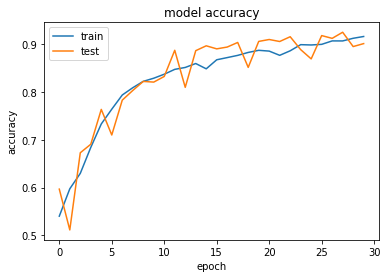

In [20]:
print("Model Accuracy\n")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model Loss



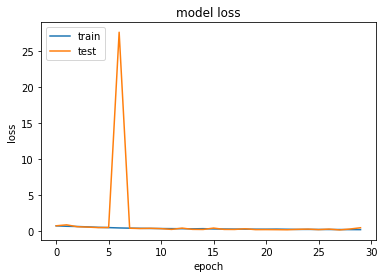

In [21]:
print("Model Loss\n")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Prediction System

In [22]:
test_images = os.listdir("../input/dogs-vs-cats/test/test/")
test_data = pd.DataFrame({   'filename': test_images})
 


In [23]:
number_samples=test_data.shape[0]

In [24]:

predict = model.predict(testdata_generator, steps=np.ceil(number_samples/batch_size))

In [25]:
test_data['label'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in traindata_generator.class_indices.items())
test_data["label"] = test_data['label'].replace(label_map)
test_data['label'] = test_data['label'].replace({ 'dog': 1, 'cat': 0 })

In [26]:
test_data

,filename,label
0,7981.jpg,1
1,6234.jpg,1
2,1269.jpg,1
3,3863.jpg,1
4,6241.jpg,1
...,...,...
12495,8152.jpg,0
12496,3361.jpg,1
12497,2599.jpg,1
12498,10035.jpg,0


 Visualize the prediction results

In [27]:
sample_test = test_data.head(10)
sample_test.head()

,filename,label
0,7981.jpg,1
1,6234.jpg,1
2,1269.jpg,1
3,3863.jpg,1
4,6241.jpg,1


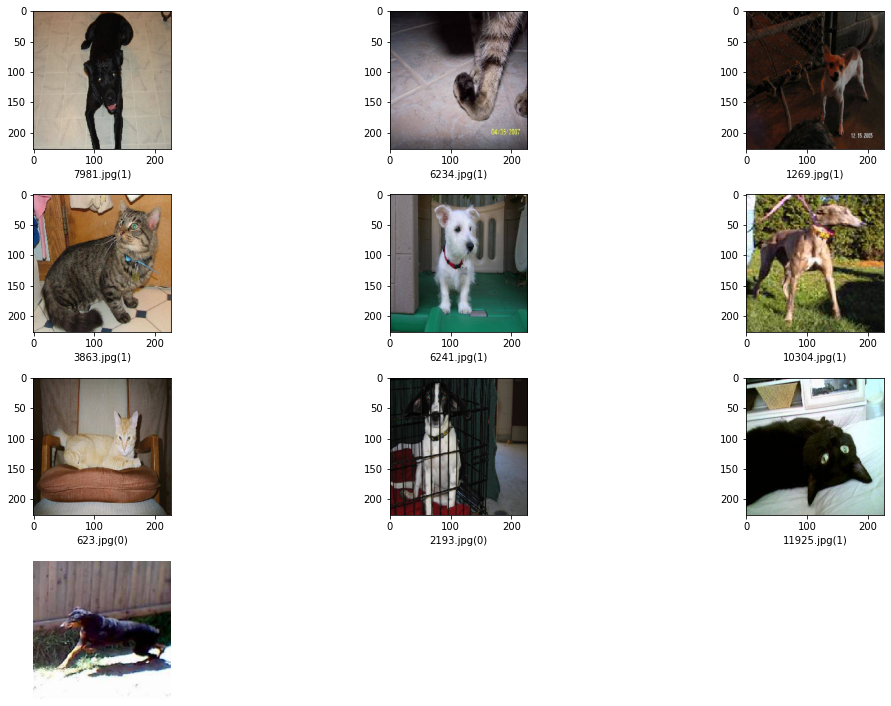

In [28]:

plt.figure(figsize=(15, 15))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['label']
    img = load_img("../input/dogs-vs-cats/test/test/"+filename, target_size=image_size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.axis("off")
plt.show()

Test  model performance on custom data

dog


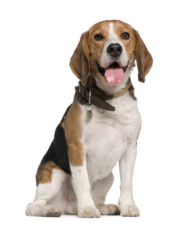

In [29]:
results={0:'cat',    1:'dog'}
font = ImageFont.truetype(r'../input/font-test/Matias.otf',300)

test_image_path=Image.open("../input/cat-and-dog-images/istockphoto-962855368-612x612.jpg")
imge=test_image_path.resize(image_size)
imge=np.expand_dims(imge,axis=0)
imge=np.array(imge)/255
final_predct=np.argmax(model.predict([imge])[0])


        
print(results[final_predct])
plt.imshow(test_image_path)
plt.axis("off")
plt.show()